# Данные

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

corp_col = '#40ba21'


In [2]:
df = pd.read_csv("Never Trust Summary Statistics.tsv", delimiter="\t")
df["dataset"].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [3]:
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


## Исходный массив имеет всего три переменных, для него не имеет смысла применять методы снижения размерности. Поэтому я взял массив "RedWineQuality.csv".

In [4]:
df = pd.read_csv("RedWineQuality.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Домашнее задание 9. Снижение размерности.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
data = pd.read_csv("RedWineQuality.csv", delimiter=";")

features = data.drop('quality', axis=1)
target = data['quality']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация моделей
models = {
    "Линейная регрессия": LinearRegression(),
    "Гребневая регрессия": Ridge(alpha=1.0),
    "SVM": SVR(C=1.0)
}

# Таблица для результатов
results = []

# 0. Обучение моделей на исходных данных
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Модель': name,
        'Данные': 'Исходные',
        'Компоненты': X_train_scaled.shape[1],
        'MSE': mse,
        'R2': r2
    })

# 1-2. Применение PCA и выбор количества компонент
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1  # Порог 95%

# Преобразование данных с выбранным количеством компонент
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Обучение моделей на PCA-данных
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Модель': name,
        'Данные': 'PCA',
        'Компоненты': n_components,
        'MSE': mse,
        'R2': r2
    })

# Результаты в таблице
results_df = pd.DataFrame(results)
print(results_df)

                Модель    Данные  Компоненты       MSE        R2
0   Линейная регрессия  Исходные          11  0.390025  0.403180
1  Гребневая регрессия  Исходные          11  0.390038  0.403161
2                  SVM  Исходные          11  0.351374  0.462324
3   Линейная регрессия       PCA           9  0.392509  0.399380
4  Гребневая регрессия       PCA           9  0.392526  0.399354
5                  SVM       PCA           9  0.358104  0.452026


In [ ]:
results_df.round(3)

,Модель,Данные,Компоненты,MSE,R2
0,Линейная регрессия,Исходные,11,0.390,0.403
1,Гребневая регрессия,Исходные,11,0.390,0.403
2,SVM,Исходные,11,0.351,0.462
3,Линейная регрессия,PCA,9,0.393,0.399
4,Гребневая регрессия,PCA,9,0.393,0.399
5,SVM,PCA,9,0.358,0.452


## Выводы

PCA сократил признаки с 11 до 9 (сохранено 95% дисперсии).

Качество моделей на PCA-данных: Нет значительного изменения метрик и существенного ухудшения качества.

Итог: PCA не изменило результаты, но и значительно сократить размерность данных не удалось (с 11 до 9). При этом в целом все модели показали слабые результаты (R2 на уровне 40%-45%), не много выделился лишь метод SVM c R2 около 45%.

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


## Метод t-SNE

f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
f:\Staff\Иннополис\I

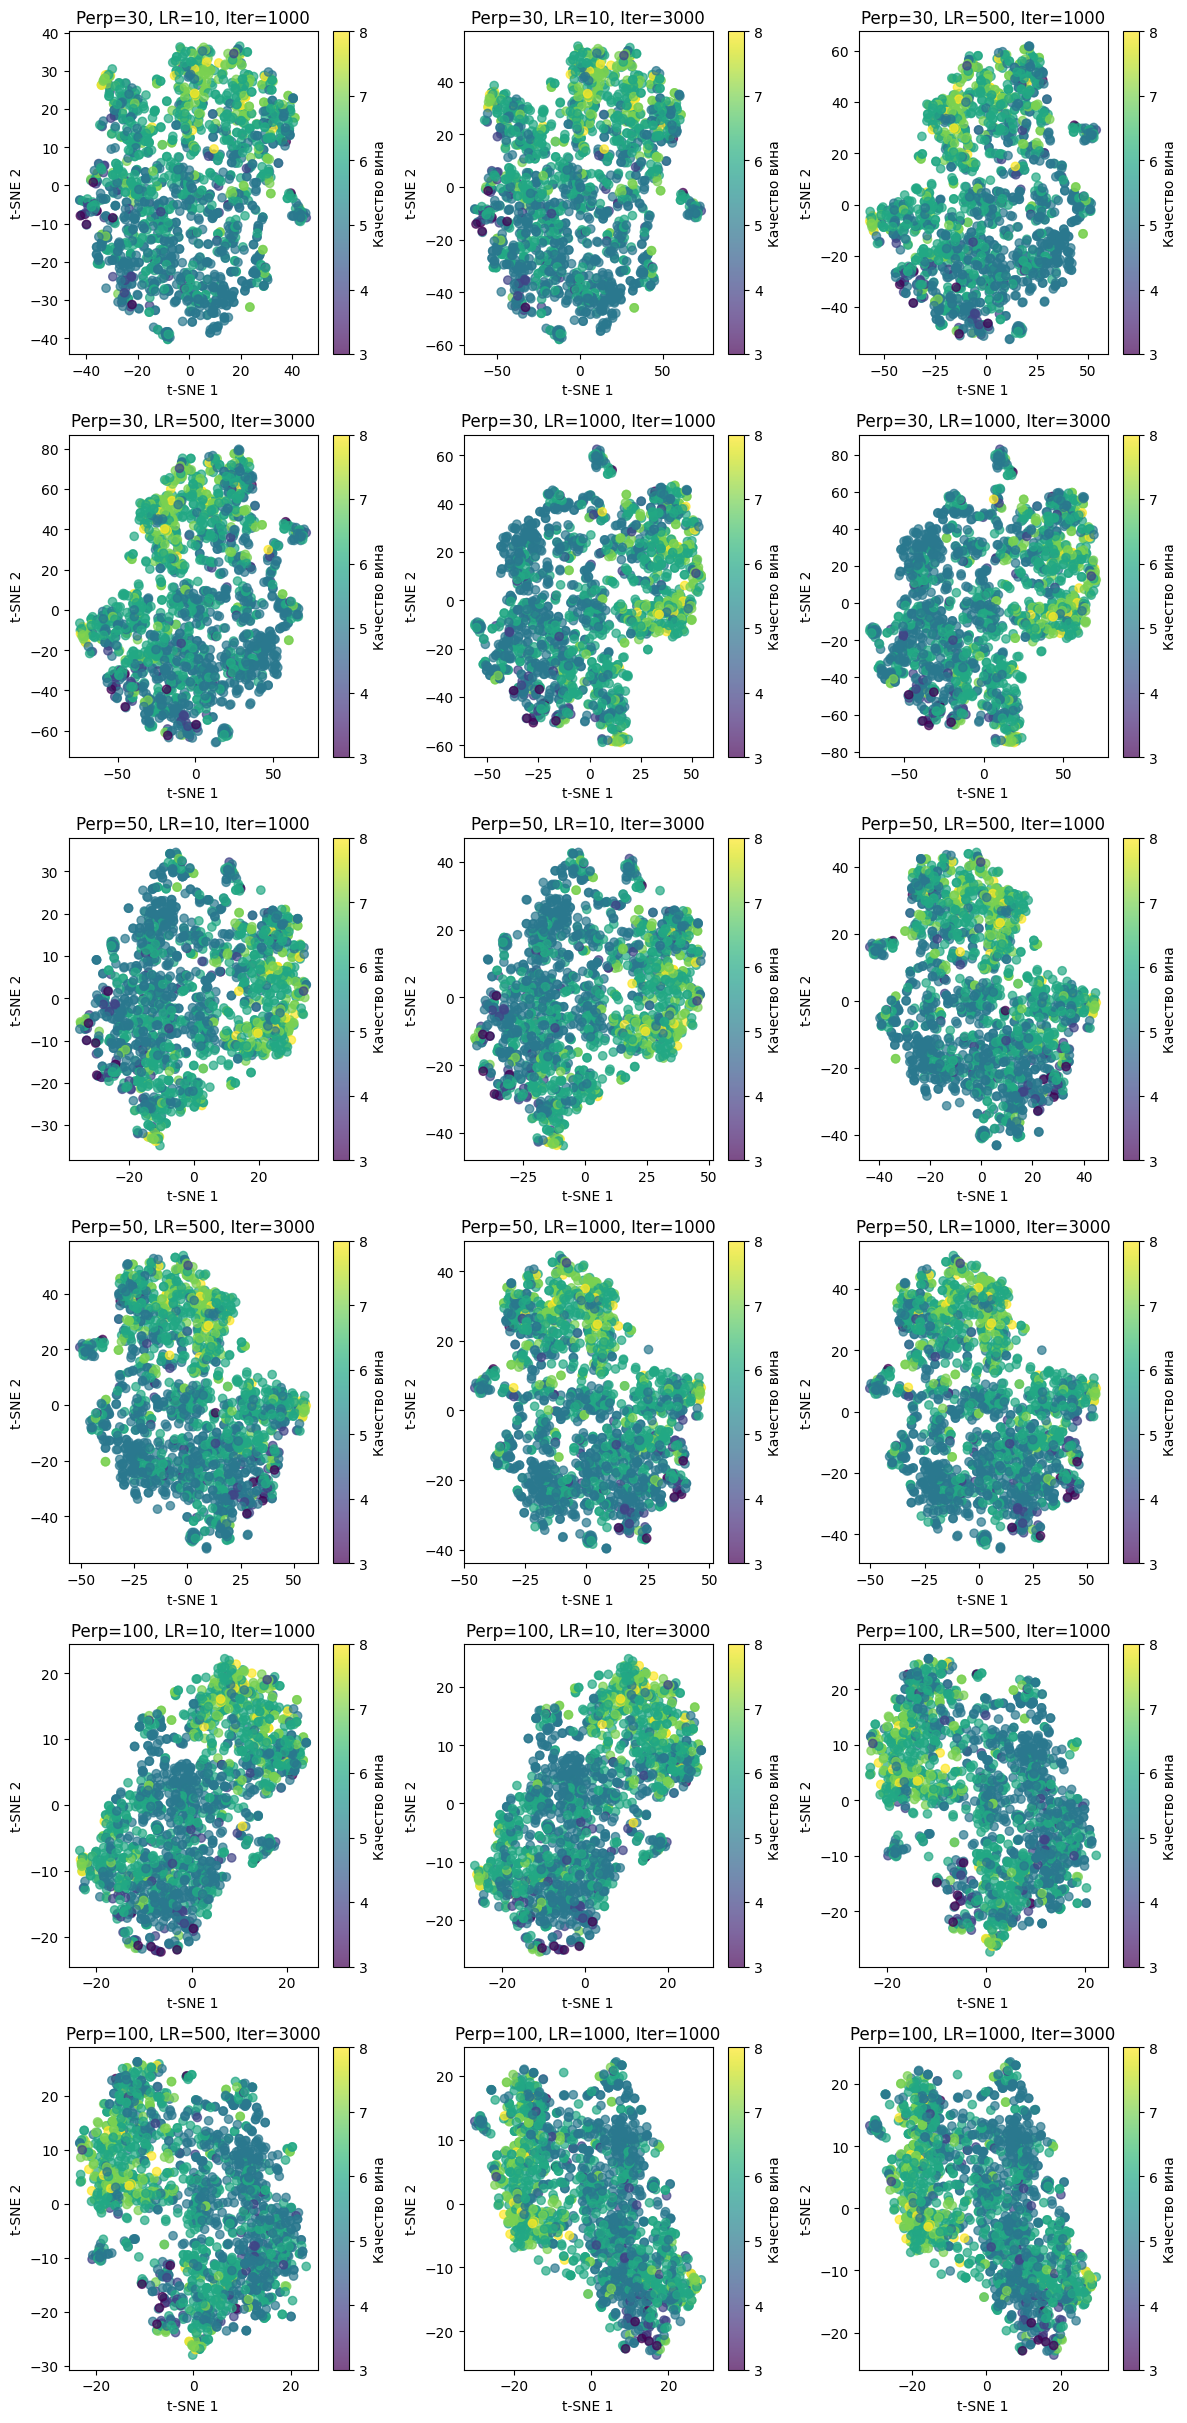

In [10]:

# Масштабирование данных
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Параметры для подбора
perplexities = [30, 50, 100]
learning_rates = [10, 500, 1000]
n_iters = [1000, 3000]

# Визуализация с разными параметрами
plt.figure(figsize=(12, 36))
plot_idx = 1

for perp in perplexities:
    for lr in learning_rates:
        for n_iter in n_iters:
            # Создание и обучение t-SNE
            tsne = TSNE(n_components=2, 
                        perplexity=perp,
                        learning_rate=lr,
                        n_iter=n_iter,
                        random_state=42,
                        init='random')
            tsne_result = tsne.fit_transform(features_scaled)
            
            # Построение графика
            plt.subplot(9, 3, plot_idx)
            scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                                 c=target, cmap='viridis', alpha=0.7)
            plt.colorbar(scatter, label='Качество вина')
            plt.title(f'Perp={perp}, LR={lr}, Iter={n_iter}')
            plt.xlabel('t-SNE 1')
            plt.ylabel('t-SNE 2')
            plot_idx += 1

plt.tight_layout()
plt.show()

Следуюшие параметры позволили наиболее четкую структуру и кластеры в данных: 
 * Perplexity = 50
 * Learning Rate = 1000
 * Число итераций = 3000

### Оптимальные параметры.

f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 't-SNE 2')

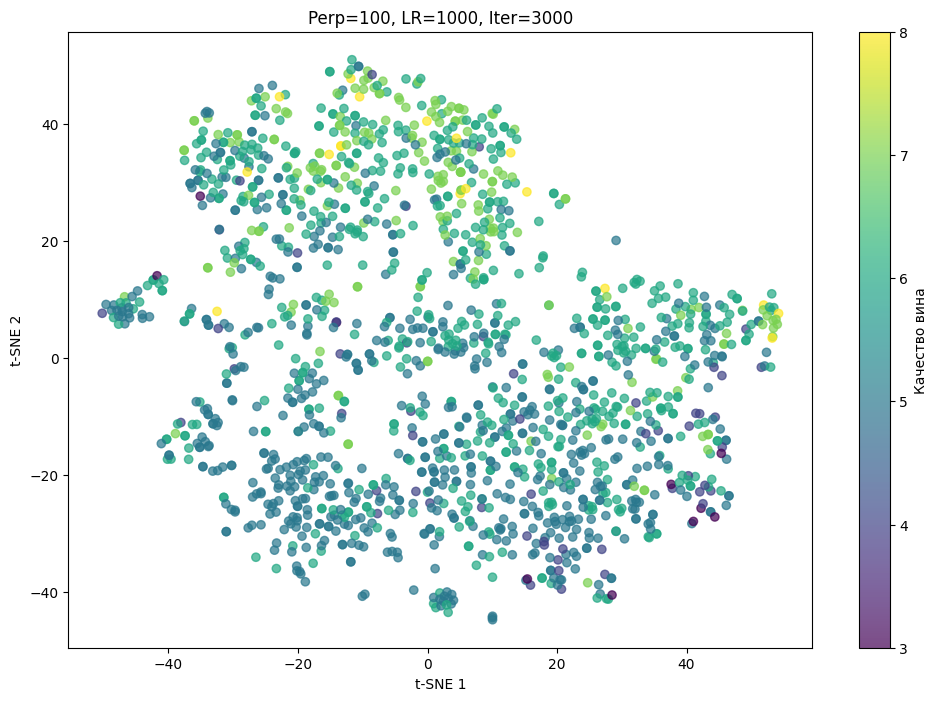

In [ ]:
tsne = TSNE(n_components=2, 
                        perplexity=50,
                        learning_rate=1000,
                        n_iter=3000,
                        random_state=42,
                        init='random')
tsne_result = tsne.fit_transform(features_scaled)
            
# Построение графика
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                                 c=target, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Качество вина')
plt.title(f'Perp={perp}, LR={lr}, Iter={n_iter}')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')


### Вывод: Два крупных кластера -- один с преимузественно качественными винами (левый верхний), другой с преимущественно с винами минимального качества (правый нижний). Два средних кластера -- один с винами низкого качества (нижний), один с втнами хорошего качества (правый). Также можно выделить в центре четыре кластера среднего качества, включая один довольно изолированный кластер (слева).